# The theory of thermal explosion

according to Semenov and Frank-Kamenetskii

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Model 1 - adiabatic explosion

**Evolution of $\widetilde{\theta}$ solution of $\, d_{\tau} \widetilde{\theta} = e^{\widetilde{\theta}}$**

In [7]:
def fcn(t, theta): 
    return np.exp(theta)

tini = 0.0
tend = 1.0

yini = (0.0,)

sol = solve_ivp(fcn, (tini, tend), yini, method='RK45', rtol=1.e-12, atol=1.e-12)

fig = go.Figure()
fig.add_trace(go.Scatter(x=sol.t, y=sol.y[0]))
fig.update_xaxes(range=[0, 1.1])
fig.update_layout(title="Evolution of \u03B8(t)", xaxis_title="t", yaxis_title="\u03B8")
fig.show()

**Graph of the function $ \theta \mapsto \lambda(\theta) = \left(1-\frac{\theta}{\bar{T}_r}\right) e^{\frac{\theta}{1+\theta/\beta}}$**

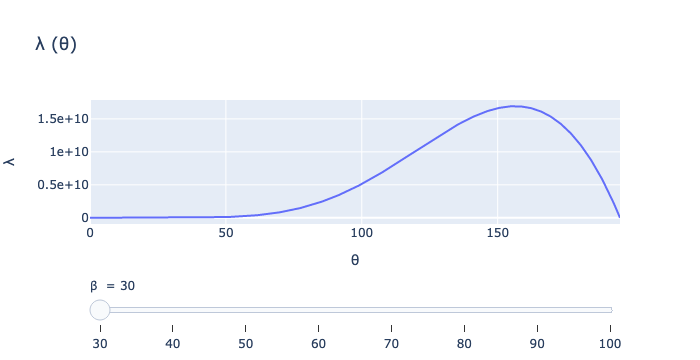

In [11]:
T0 = 400.
Tb = 3000.

beta = np.arange(30, 101, 10)

fig = go.Figure()

for i, beta_i in enumerate(beta):
    barTr = beta_i*(Tb-T0)/T0
    theta = np.linspace(0,barTr,1000)
    Lambda = np.exp(theta/(1+theta/beta_i)) * (1-theta/barTr)
    fig.add_trace(go.Scatter(visible=False, x=theta, y=Lambda))

fig.data[0].visible = True

# create slider
steps = []
for i, beta_i in enumerate(beta):
    step = dict(method="update", label = f"{beta_i}", args=[{"visible": [(el==i) for el in range(beta.size)]}])
    steps.append(step)
sliders = [dict(currentvalue={'prefix': '\u03B2  = '}, steps=steps)]

fig.update_layout(sliders=sliders, yaxis=dict(exponentformat = 'e'), 
                  title="\u03BB (\u03B8)", xaxis_title="\u03B8", yaxis_title="\u03BB")
fig['layout']['sliders'][0]['pad']=dict(t= 50)
fig.show()

## Model 2 - explosion taking into account thermal losses

$$
\left\{\begin{aligned}
d_{\tau} \theta & = \exp\Bigg(\frac{\theta}{1 + \theta \, / \, \beta}\Bigg) y - \alpha_0 \, \theta \\
d_{\tau} y & = -\frac{1}{\overline T_r} \exp\Bigg(\frac{\theta}{1 + \theta \, / \, \beta}\Bigg)  y
\end{aligned}\right.
$$

In [12]:
class second_model:

    def __init__(self, alpha, T0, Tb, beta):
        self.alpha = alpha
        self.T0 = T0
        self.Tb = Tb
        self.beta = beta 

    def fcn(self, t, u):
        theta, y = u
        alpha = self.alpha
        beta = self.beta
        T0 = self.T0
        Tb = self.Tb
        barTr = beta*(Tb-T0)/T0
        theta_dot = np.exp(theta/(1+(theta/beta))) * y - alpha*theta 
        y_dot     = (-1/barTr) * np.exp(theta/(1+(theta/beta))) * y
        return (theta_dot, y_dot)

**Evolution of $\theta(t)$ and $y(t)$**

In [20]:
alpha = np.arange(0, 2.9, 0.2)

T0 = 400.
Tb = 3000.
beta = 30.

tini = 0.0
tend = 20.0

yini = (0.0, 1.0)

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.1,
                    subplot_titles=("Evolution of \u03B8(t)", "Evolution of y(t)"))

for i, alpha_i in enumerate(alpha):
    sm = second_model(alpha_i, T0, Tb, beta)
    fcn = sm.fcn
    sol = solve_ivp(fcn, (tini, tend), yini, method='Radau', atol=1.e-8, rtol=1.e-8)
    fig.add_trace(go.Scatter(visible=False, x=sol.t, y=sol.y[0], line_color='#636EFA'), row=1, col=1)
    fig.add_trace(go.Scatter(visible=False, x=sol.t, y=sol.y[1], line_color='#636EFA'), row=2, col=1)

fig.data[0].visible = True
fig.data[1].visible = True

# create slider
steps = []
for i, alpha_i in enumerate(alpha):
    step = dict(method="update", label = f"{alpha_i:.1f}", 
                args=[{"visible": [(el==2*i) or (el==2*i+1) for el in range(len(fig.data))]}])
    steps.append(step)
sliders = [dict(currentvalue={'prefix': '\u03B1 = '}, steps=steps)]
    
fig.update_layout(sliders=sliders, showlegend=False, height=800)
fig.update_xaxes(title_text="t", row=1, col=1)
fig.update_yaxes(title_text="\u03B8", row=1, col=1)
fig.update_xaxes(title_text="t", row=2, col=1)
fig.update_yaxes(title_text="y", row=2, col=1)
fig['layout']['sliders'][0]['pad']=dict(t= 50)
fig.show()

**Graphs of  $e^\widetilde{\theta}$ and $ \alpha_0 \, \widetilde{\theta}$**

In [31]:
e = np.exp(1)
eover10 = np.exp(1) / 10
alpha = np.arange(e-5*eover10, e+5*eover10, eover10)

theta = np.linspace(0, 2.5,1000)

exp = np.exp(theta)
q = alpha_i*theta

fig = go.Figure()
fig.add_trace(go.Scatter(x=theta, y=exp, name="exp(\u03B8)"))

for i, alpha_i in enumerate(alpha):
    q = alpha_i*theta
    fig.add_trace(go.Scatter(visible=False, x=theta, y=q, name="\u03B10 \u03B8"))
    
fig.data[1].visible = True

steps = []
for i, alpha_i in enumerate(alpha):
    step = dict(method="update", label = f"{alpha_i:.3f}", 
                args=[{"visible": [(el==0) or (el==i+1) for el in range(len(fig.data))]}])
    steps.append(step)
sliders = [dict(currentvalue={'prefix': '\u03B10 = '}, steps=steps)]

fig.update_layout(sliders=sliders, xaxis_title="\u03B8")
fig['layout']['sliders'][0]['pad']=dict(t= 50)
fig.show()

## Model 3 - explosion taking into account convection

$$
\left\{\begin{aligned}
d_{\tau} \widetilde{\theta} & = e^{\widetilde{\theta}} - \alpha_0 \, (1 + \mu \, \psi^2) \, \widetilde{\theta} \\
d_{\tau} \psi & = -a \, \psi (\psi^2 + \widetilde{\theta}_c - \widetilde{\theta})
\end{aligned}\right.
$$

In [27]:
class third_model:

    def __init__(self, alpha0, mu, a, thetac):
        self.alpha0 = alpha0
        self.mu = mu
        self.a = a
        self.thetac = thetac

    def fcn(self, t, u):
        theta, psi = u
        alpha0 = self.alpha0
        mu = self.mu
        a = self.a
        thetac = self.thetac
        theta_dot = np.exp(theta) - alpha0*(1 + mu*psi*psi) * theta
        psi_dot = -a*psi*(psi*psi+thetac-theta)
        return (theta_dot, psi_dot)

**Evolution of $\widetilde{\theta}(t)$ and phase plan $(\widetilde{\theta}, \psi)$**

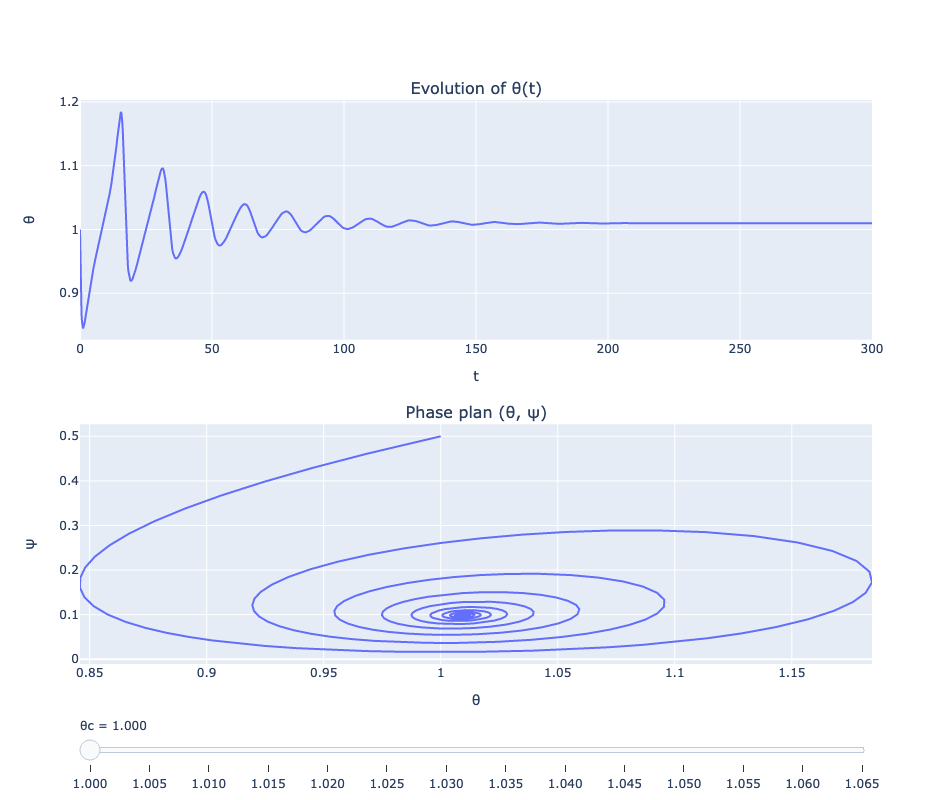

In [38]:
alpha0 = 2.7 
mu = 0.7
a =  4.3

thetac = np.arange(1.0, 1.066, 0.005)

tini = 0. 
tend = 300.

yini = (1.0, 0.5)
# yini = (0., 0.01)


fig = make_subplots(rows=2, cols=1, vertical_spacing=0.15,
                    subplot_titles=("Evolution of \u03B8(t)", "Phase plan (\u03B8, \u03C8)"))

for i, thetac_i in enumerate(thetac):
    tm = third_model(alpha0, mu, a, thetac_i)
    fcn = tm.fcn
    sol = solve_ivp(fcn, (tini, tend), yini, method='RK45', atol=1.e-8, rtol=1.e-8)
    fig.add_trace(go.Scatter(visible=False, x=sol.t, y=sol.y[0], line_color='#636EFA'), row=1, col=1)
    fig.add_trace(go.Scatter(visible=False, x=sol.y[0], y=sol.y[1], line_color='#636EFA'), row=2, col=1)

fig.data[0].visible = True
fig.data[1].visible = True

# create slider
steps = []
for i, thetac_i in enumerate(thetac):
    step = dict(method="update", label = f"{thetac_i:.3f}", 
                args=[{"visible": [(el==2*i) or (el==2*i+1) for el in range(len(fig.data))]}])
    steps.append(step)
sliders = [dict(currentvalue={'prefix': '\u03B8c = '}, steps=steps)]

fig.update_layout(sliders=sliders, showlegend=False, height=800)
fig.update_xaxes(title_text="t", row=1, col=1)
fig.update_yaxes(title_text="\u03B8", row=1, col=1)
fig.update_xaxes(title_text="\u03B8", row=2, col=1)
fig.update_yaxes(title_text="\u03C8", row=2, col=1)
fig['layout']['sliders'][0]['pad']=dict(t= 50)
fig.show()